In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [2]:
root=Path("Task03_Liver_rs/imagesTr/")
label=Path("Task03_Liver_rs/labelsTr/")

In [3]:

def img_to_label_path(path):
    parts=list(path.parts)
    parts[parts.index("imagesTr")]="labelsTr"
    return Path(*parts)

In [4]:
sample_path=list(root.glob("liver*"))[0]
sample_path_label=img_to_label_path(sample_path)

In [5]:
data = nib.load(sample_path)
label = nib.load(sample_path_label)

ct = data.get_fdata()
mask = label.get_fdata().astype(int)

In [6]:
ct.shape

(180, 180, 125)

In [7]:
nib.aff2axcodes(data.affine)

('R', 'A', 'S')

<IPython.core.display.Javascript object>


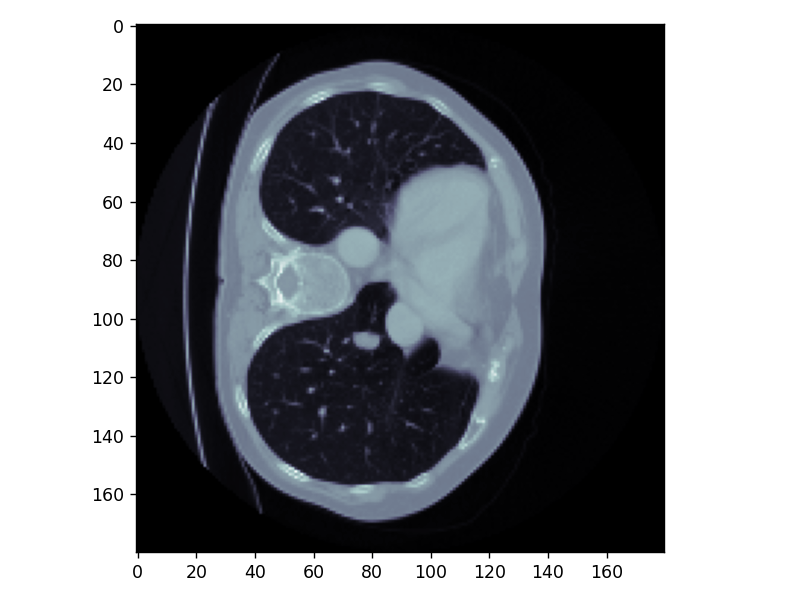

In [8]:
fig = plt.figure()
camera = Camera(fig)  

for i in range(ct.shape[2]): 
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5)
    camera.snap()  
plt.tight_layout()
animation = camera.animate()

In [ ]:
HTML(animation.to_html5_video())

C:\Users\KIIT\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\KIIT\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
